In [1]:
import arch

In [2]:
!wget https://environmental-hack.s3-us-west-2.amazonaws.com/data.zip

--2019-07-12 19:36:55--  https://environmental-hack.s3-us-west-2.amazonaws.com/data.zip
Resolving environmental-hack.s3-us-west-2.amazonaws.com... 52.218.248.25
Connecting to environmental-hack.s3-us-west-2.amazonaws.com|52.218.248.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14390297 (14M) [application/zip]
Saving to: 'data.zip'

data.zip            100%[===================>]  13.72M  2.94MB/s    in 4.7s    

2019-07-12 19:37:00 (2.92 MB/s) - 'data.zip' saved [14390297/14390297]



In [3]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/2018-01-01__2019-01-01__NConservatory_npWeekdayAllOrderedSensorsTimeRef_sampleBounds.npy  
  inflating: data/2018-01-01__2019-01-01__NConservatory_npWeekdayAllOrderedSensorsTimeRef.npy  
  inflating: data/2018-01-01__2019-01-01__SConservatory__allMerged.csv  
  inflating: data/2018-01-01__2019-01-01__SConservatory_npWeekdayAllOrderedSensorsTimeRef_sampleBounds.npy  
  inflating: data/2018-01-01__2019-01-01__NConservatory__allMerged.csv  
  inflating: data/2018-01-01__2019-01-01__SConservatory_npWeekdayAllOrderedSensorsTimeRef.npy  


In [419]:
!wget https://environmental-hack.s3-us-west-2.amazonaws.com/testData.zip

--2019-07-13 11:43:59--  https://environmental-hack.s3-us-west-2.amazonaws.com/testData.zip
Resolving environmental-hack.s3-us-west-2.amazonaws.com... 52.218.235.57
Connecting to environmental-hack.s3-us-west-2.amazonaws.com|52.218.235.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18524341 (18M) [application/zip]
Saving to: 'testData.zip'

testData.zip        100%[===================>]  17.67M   670KB/s    in 24s     

2019-07-13 11:44:24 (746 KB/s) - 'testData.zip' saved [18524341/18524341]



In [420]:
!unzip testData.zip

Archive:  testData.zip
  inflating: test_data/nConservatory_2019_testData.npy  


In [2]:
import sklearn
from sklearn.metrics import classification_report
from sklearn import preprocessing
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns
import datetime

%matplotlib inline
plt.rcParams['figure.figsize'] = [9.5, 13]
plt.rcParams['figure.subplot.left'] = plt.rcParams['figure.subplot.bottom'] = .1
plt.rcParams['figure.subplot.right'] = plt.rcParams['figure.subplot.top'] = .9



In [3]:
dataset = pd.read_csv( index_col = 0,  parse_dates = True, infer_datetime_format = True, 
                         filepath_or_buffer = './data/2018-01-01__2019-01-01__NConservatory__allMerged.csv')
dataset.index = pd.to_datetime(dataset.index, utc=True)

In [4]:
dependent_vars=dataset.drop(['externTemp_1', 'externHumid_1', 'externCondition_1',
       'externSunrise_1'], axis=1)

In [5]:
co21 = dataset.co2_1[34800:]

/Users/alex/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


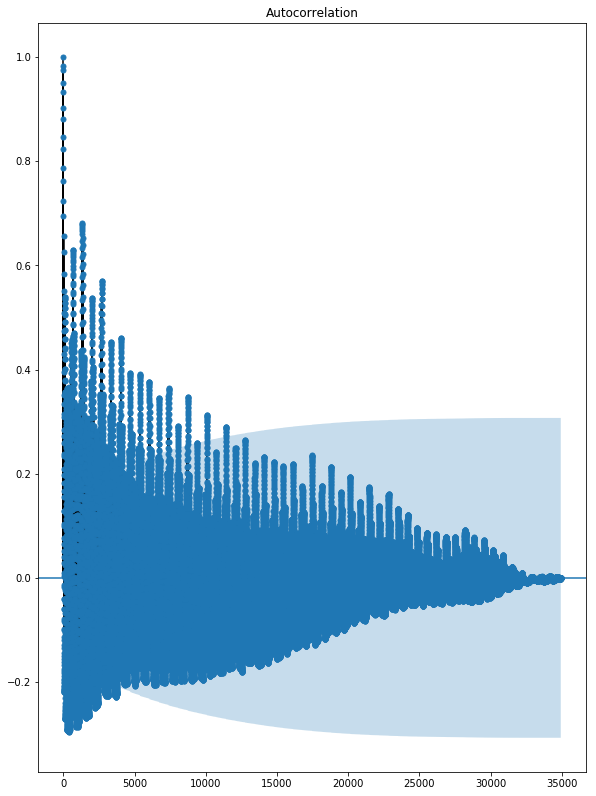

In [6]:
# check correlations of squared observations
from random import gauss
from random import seed
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
# seed pseudorandom number generator
seed(1)
# create dataset
# square the dataset
# create acf plot
plot_acf(dataset.co2_1)
pyplot.show()

In [7]:
# define model
from arch import arch_model
model = arch_model(dataset['co2_1'], mean='Zero', vol='ARCH', p=85)

In [8]:
# fit model
model_fit = model.fit()

Iteration:      1,   Func. Count:     88,   Neg. LLF: 268637.03002616105
Iteration:      2,   Func. Count:    176,   Neg. LLF: 267265.8394734287
Iteration:      3,   Func. Count:    265,   Neg. LLF: 267260.4173715089
Iteration:      4,   Func. Count:    354,   Neg. LLF: 267259.78255374415
Iteration:      5,   Func. Count:    445,   Neg. LLF: 267259.7534022312
Iteration:      6,   Func. Count:    534,   Neg. LLF: 267259.4254880873
Iteration:      7,   Func. Count:    623,   Neg. LLF: 267259.3234764267
Iteration:      8,   Func. Count:    711,   Neg. LLF: 267259.25531269005
Iteration:      9,   Func. Count:    800,   Neg. LLF: 267259.2301498047
Iteration:     10,   Func. Count:    889,   Neg. LLF: 267259.20635425154
Iteration:     11,   Func. Count:    978,   Neg. LLF: 267259.20144346263
Iteration:     12,   Func. Count: 1.07e+03,   Neg. LLF: 267259.2008760443
Iteration:     13,   Func. Count: 1.16e+03,   Neg. LLF: 267259.2008380783
Iteration:     14,   Func. Count: 1.24e+03,   Neg. LLF:

In [9]:
yhat = model_fit.forecast(horizon=1000)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


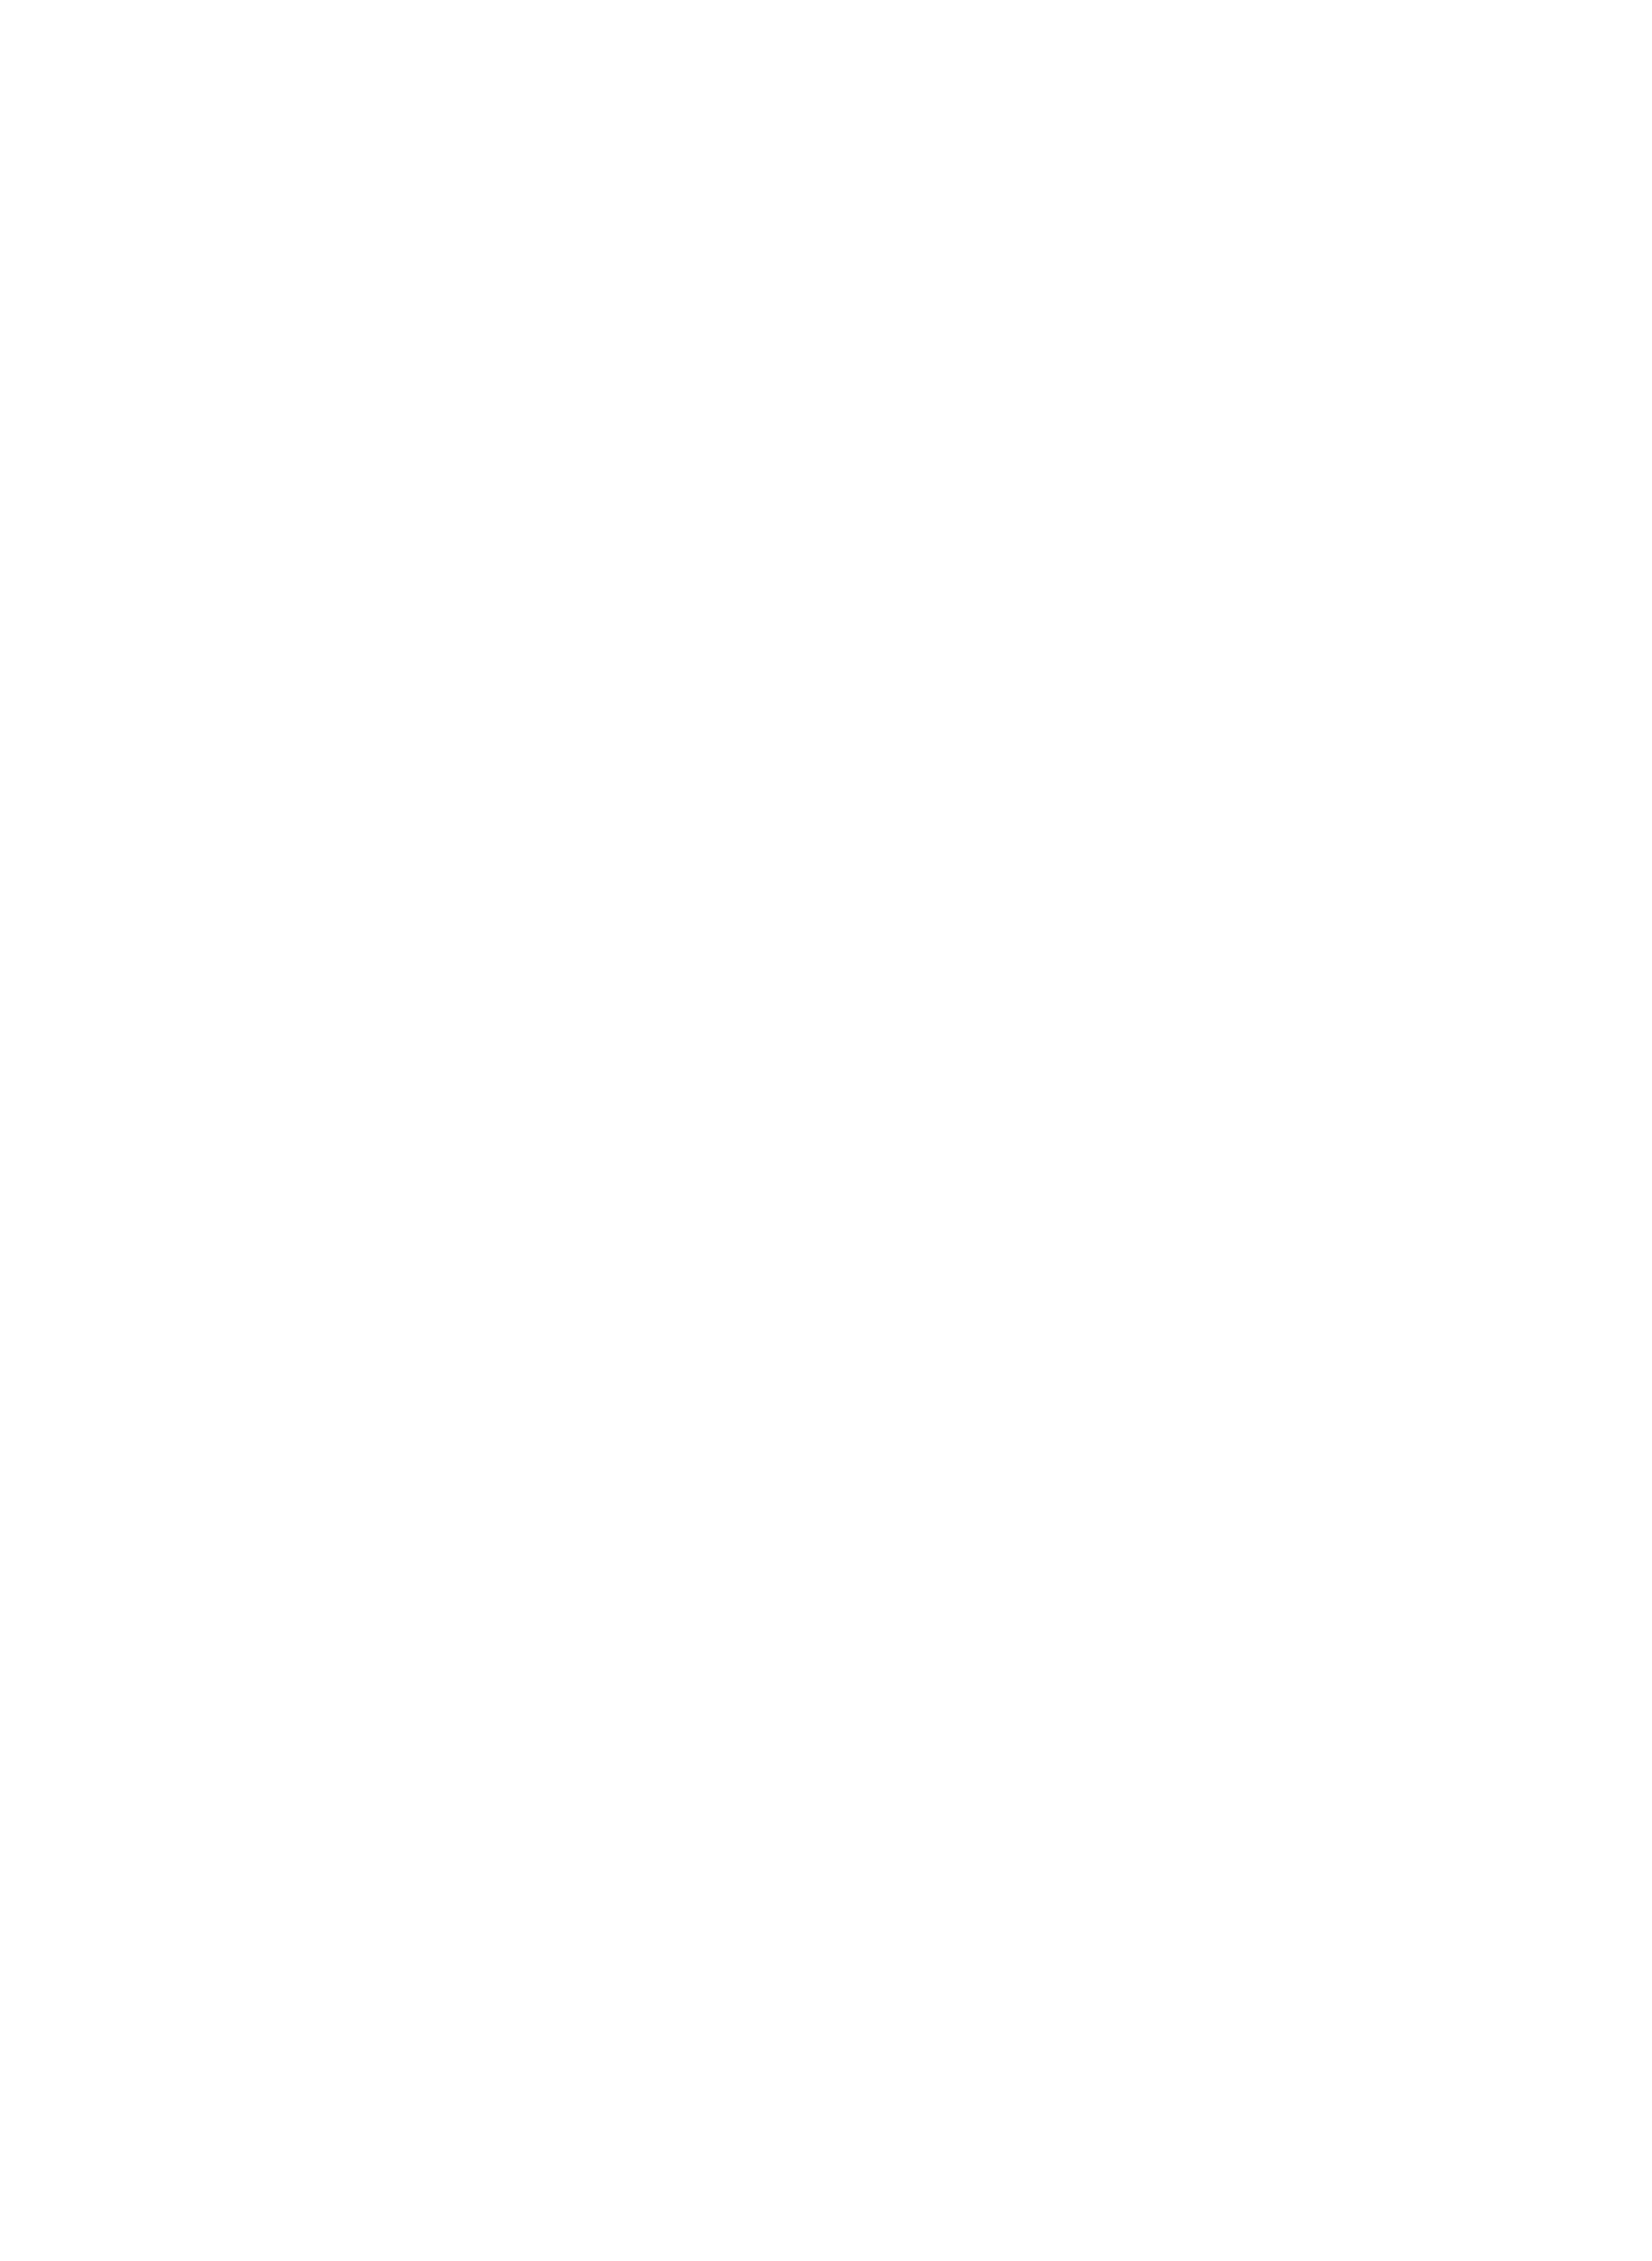

In [55]:
# plt.plot(pd.Series(yhat.variance.values[-1, :]))
plt.plot(pd.Series(dataset['co2_1'][1000:2000]))

In [45]:
len(pd.Series(yhat.variance.values[-1, :]))

1000

# PROPHET!

In [180]:
from fbprophet import Prophet

m = Prophet()
df=pd.DataFrame()

df['y'] = dataset['dew_1']
df['ds'] = dataset.index
m.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [109]:
future = m.make_future_dataframe(periods=100)

In [181]:
pdf = dataset.drop(['dew_1'],axis=1)
pdf['y']=dataset['dew_1']
pdf.reset_index(inplace=True)
pdf['ds']=pdf['index']
pdf = pdf.drop(['index'],axis=1)

In [184]:
forecast = m.predict()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01 08:00:03,51.234385,49.394575,53.060411
1,2018-01-01 08:15:03,51.248822,49.421387,53.119201
2,2018-01-01 08:30:03,51.261613,49.494181,53.197326
3,2018-01-01 08:45:03,51.272149,49.424027,53.009717
4,2018-01-01 09:00:03,51.281822,49.420592,53.064525
5,2018-01-01 09:15:03,51.293880,49.443553,53.060500
6,2018-01-01 09:30:03,51.313167,49.551994,53.113696
7,2018-01-01 09:45:03,51.345749,49.498352,53.240209
8,2018-01-01 10:00:03,51.398452,49.534443,53.301600
9,2018-01-01 10:15:03,51.478352,49.742011,53.258210


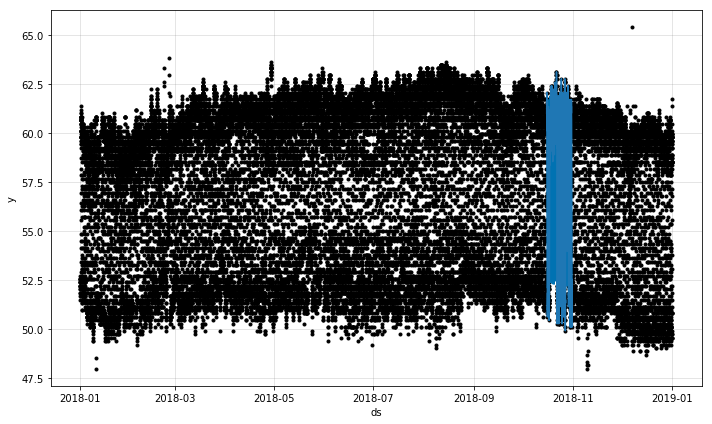

In [208]:
m.plot(forecast[27500:29000], uncertainty=False)
plt.plot(dataset['dew_1'][27500:29000])

In [253]:
results = pd.DataFrame()

for varname in dataset.columns[:16]:

    m = Prophet()
    df=pd.DataFrame()


    df['y'] = dataset[varname]
    df['ds'] = dataset.index
    m.fit(df)

    pdf = dataset.drop([varname],axis=1)
    pdf['y']=dataset[varname]
    pdf.reset_index(inplace=True)
    pdf['ds']=pdf['index']
    pdf = pdf.drop(['index'],axis=1)


    forecast = m.predict()
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    forecast['y'] = pdf['y']

    results[f'{varname}_toohigh']=forecast.apply(lambda x: (2*x['yhat_upper']-x['yhat_lower']) < x['y'] ,axis=1)
    results[f'{varname}_toolow']=forecast.apply(lambda x: x['yhat_upper']-2*x['yhat_lower'] > x['y'],axis=1)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_

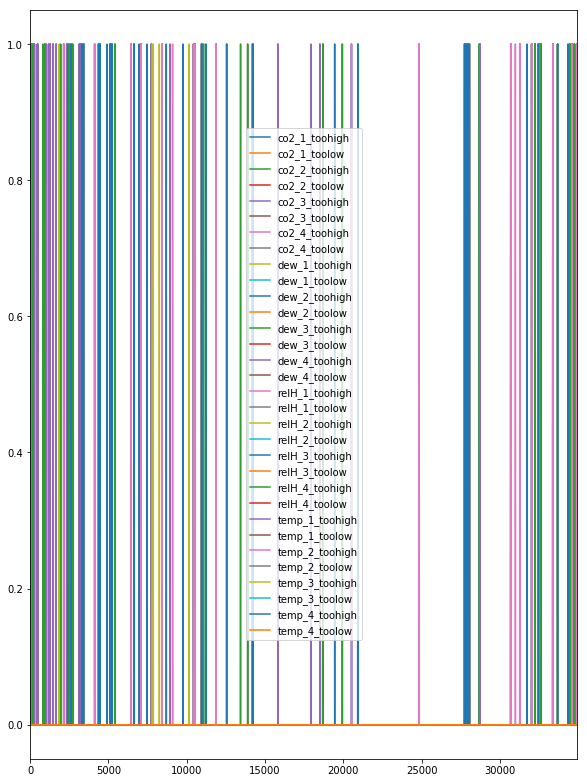

In [265]:
results.plot()

In [256]:
forecastp['']

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat,y
0,2018-01-01 08:00:03,65.520108,65.520108,65.520108,57.321374,61.451089,-5.973414,-5.973414,-5.973414,-6.163437,-6.163437,-6.163437,-6.163437,-6.163437,-6.163437,-0.190023,-0.190023,-0.190023,59.356671,58.500000
1,2018-01-01 08:15:03,65.520259,65.520259,65.520259,57.178810,61.498950,-6.035949,-6.035949,-6.035949,-6.225741,-6.225741,-6.225741,-6.225741,-6.225741,-6.225741,-0.189792,-0.189792,-0.189792,59.294519,58.299999
2,2018-01-01 08:30:03,65.520411,65.520411,65.520411,57.019959,61.216479,-6.117807,-6.117807,-6.117807,-6.307308,-6.307308,-6.307308,-6.307308,-6.307308,-6.307308,-0.189501,-0.189501,-0.189501,59.213103,58.000000
3,2018-01-01 08:45:03,65.520562,65.520562,65.520562,56.999523,61.156277,-6.217433,-6.217433,-6.217433,-6.406584,-6.406584,-6.406584,-6.406584,-6.406584,-6.406584,-0.189151,-0.189151,-0.189151,59.113978,57.799999
4,2018-01-01 09:00:03,65.520714,65.520714,65.520714,56.832060,60.920250,-6.330153,-6.330153,-6.330153,-6.518895,-6.518895,-6.518895,-6.518895,-6.518895,-6.518895,-0.188741,-0.188741,-0.188741,59.001819,57.700001
5,2018-01-01 09:15:03,65.520865,65.520865,65.520865,56.741184,61.016678,-6.448527,-6.448527,-6.448527,-6.636802,-6.636802,-6.636802,-6.636802,-6.636802,-6.636802,-0.188275,-0.188275,-0.188275,58.884063,57.700001
6,2018-01-01 09:30:03,65.521016,65.521016,65.521016,56.722443,60.799962,-6.562889,-6.562889,-6.562889,-6.750640,-6.750640,-6.750640,-6.750640,-6.750640,-6.750640,-0.187751,-0.187751,-0.187751,58.770377,57.700001
7,2018-01-01 09:45:03,65.521168,65.521168,65.521168,56.436137,60.702294,-6.662025,-6.662025,-6.662025,-6.849196,-6.849196,-6.849196,-6.849196,-6.849196,-6.849196,-0.187172,-0.187172,-0.187172,58.671972,58.000000
8,2018-01-01 10:00:03,65.521319,65.521319,65.521319,56.540733,60.636342,-6.733957,-6.733957,-6.733957,-6.920495,-6.920495,-6.920495,-6.920495,-6.920495,-6.920495,-0.186538,-0.186538,-0.186538,58.600825,58.200001
9,2018-01-01 10:15:03,65.521470,65.521470,65.521470,56.619139,60.604058,-6.766768,-6.766768,-6.766768,-6.952618,-6.952618,-6.952618,-6.952618,-6.952618,-6.952618,-0.185850,-0.185850,-0.185850,58.568853,58.299999


# Testing this shit actually works...

Text(0.5,1,'Dew Sensor 1 Anomaly Detection')

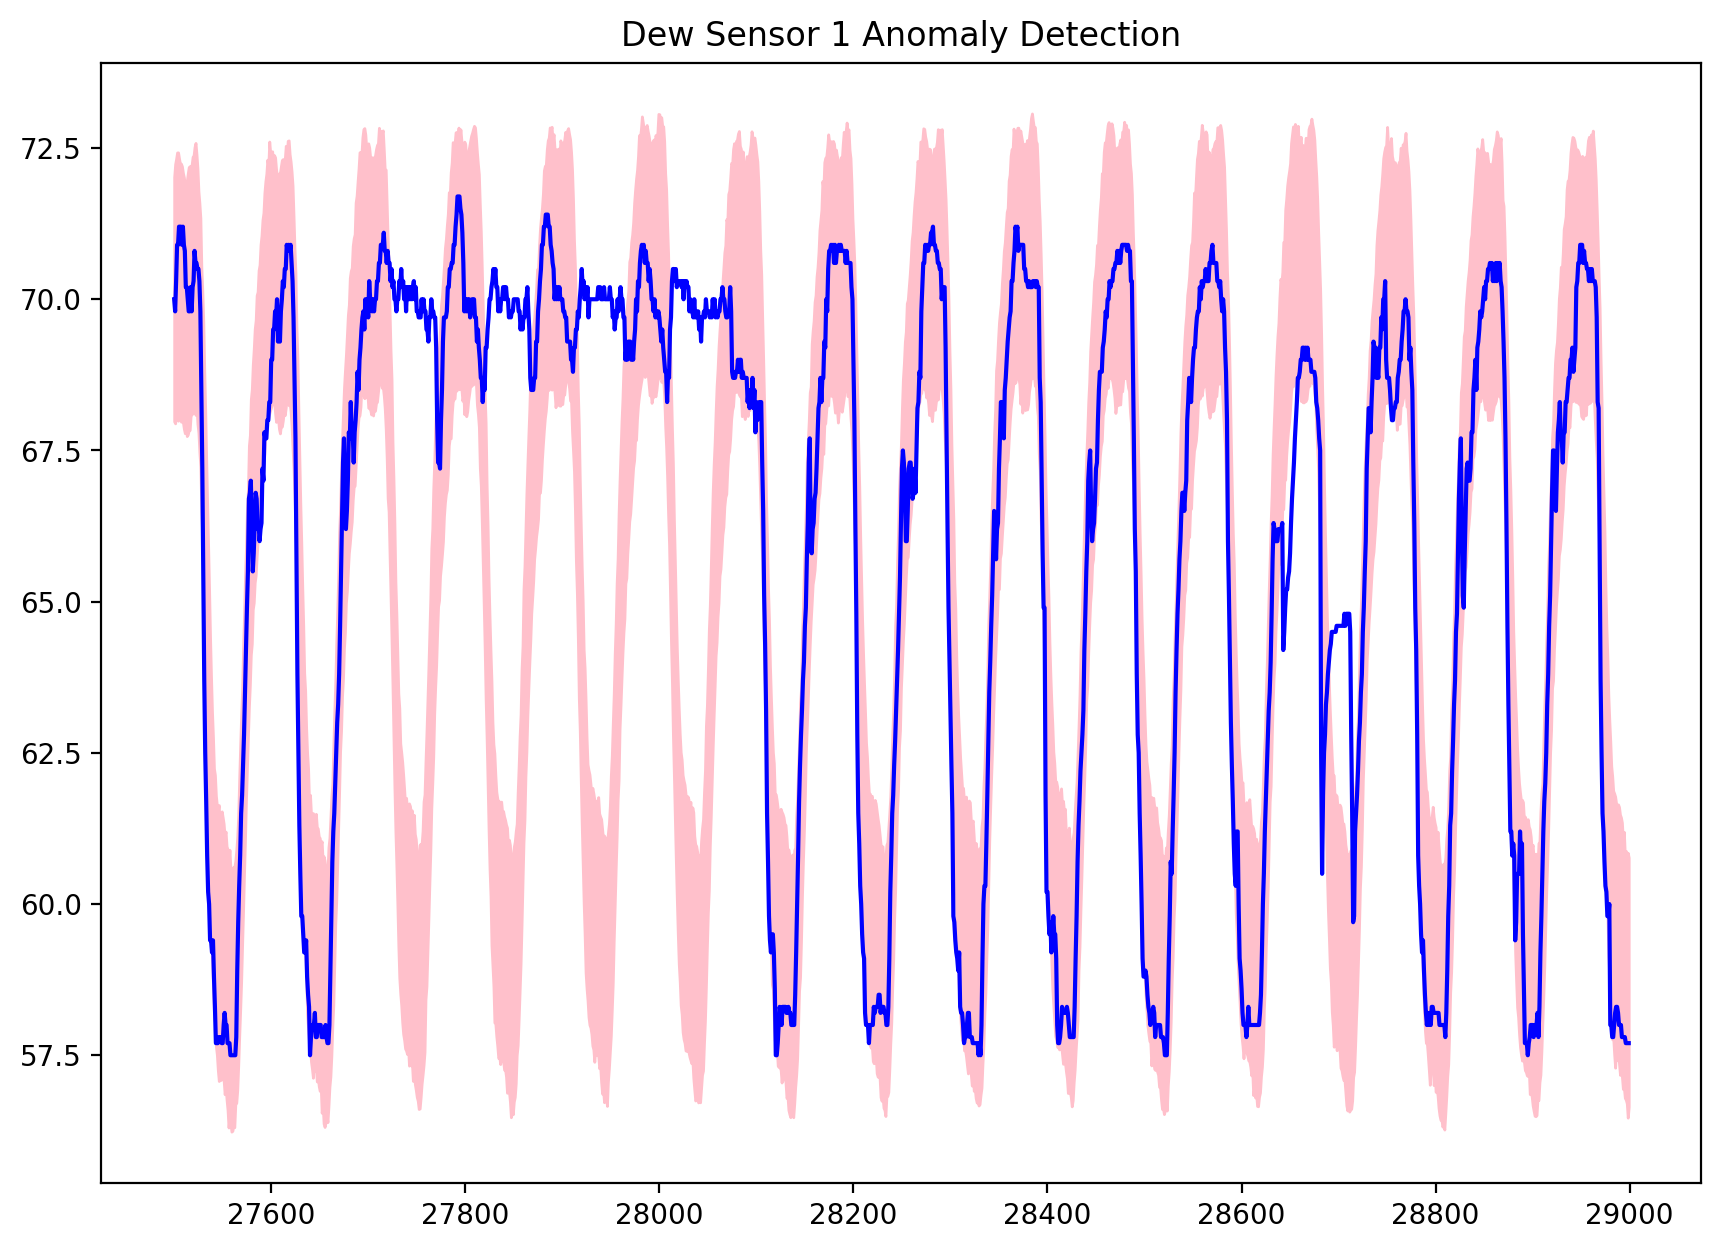

In [372]:
f, ax = plt.subplots(figsize=(10,7), dpi=200)

flarmcat = forecast[27500:29000]
# ax.plot(flarmcat.index, flarmcat['yhat'], color='g', label='week ends')
ax.fill_between(flarmcat.index, flarmcat['yhat_upper'], flarmcat['yhat_lower'], color='pink')
ax.plot(pdf['y'][27500:29000],color='blue')

plt.title('Dew Sensor 1 Anomaly Detection')



In [347]:
toohigh.value_counts()

False    31914
True      3020
dtype: int64

In [348]:
toolow.value_counts()

False    32207
True      2727
dtype: int64

In [ ]:
test_dataset = pd.read_csv( index_col = 0,  parse_dates = True, infer_datetime_format = True, 
                         filepath_or_buffer = './testData/2nConservatory_2019_testData.npy')
test_dataset.index = pd.to_datetime(dataset.index, utc=True)

In [140]:
dataset = pd.read_csv( index_col = 0,  parse_dates = True, infer_datetime_format = True, 
                         filepath_or_buffer = './data/2018-01-01__2019-01-01__NConservatory__allMerged.csv')
dataset.index = pd.to_datetime(dataset.index, utc=True)

In [141]:
dependent_vars=dataset.drop(['externTemp_1', 'externHumid_1', 'externCondition_1',
       'externSunrise_1'], axis=1)

In [152]:
df

,y,ds
2018-01-01 08:00:03,480.750000,2018-01-01 08:00:03
2018-01-01 08:15:03,480.750000,2018-01-01 08:15:03
2018-01-01 08:30:03,477.817993,2018-01-01 08:30:03
2018-01-01 08:45:03,486.612000,2018-01-01 08:45:03
2018-01-01 09:00:03,486.612000,2018-01-01 09:00:03
2018-01-01 09:15:03,474.886993,2018-01-01 09:15:03
2018-01-01 09:30:03,477.817993,2018-01-01 09:30:03
2018-01-01 09:45:03,477.817993,2018-01-01 09:45:03
2018-01-01 10:00:03,480.750000,2018-01-01 10:00:03
2018-01-01 10:15:03,474.886993,2018-01-01 10:15:03


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c2b0ff9b0>,
      dtype=object)

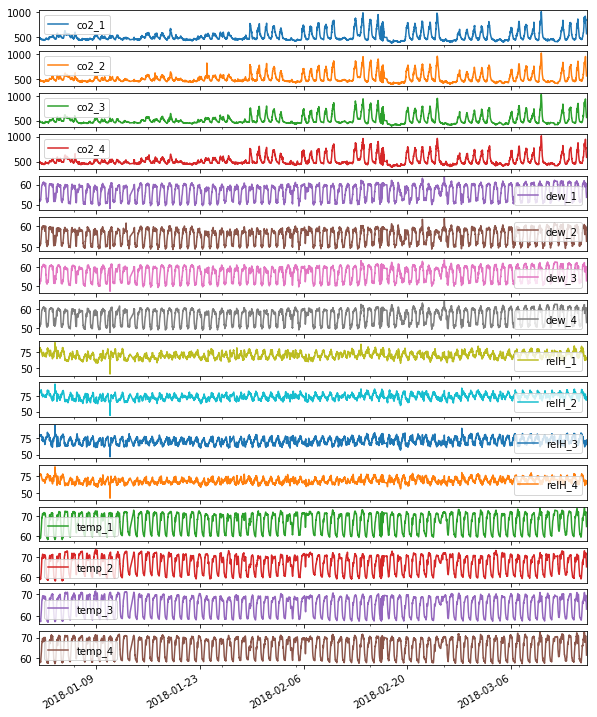

In [179]:
dependent_vars[:7000].plot(subplots=True)

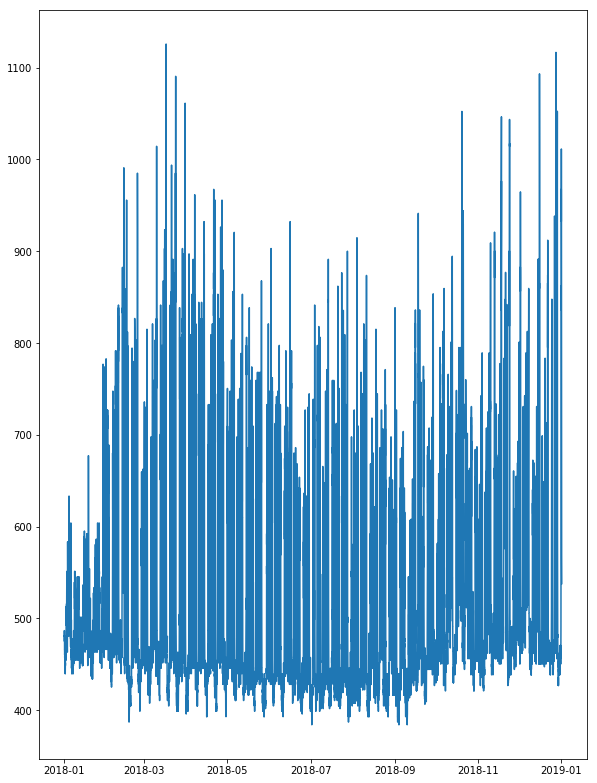

In [396]:
dataset.append(results)

,co2_1,co2_1_toohigh,co2_1_toolow,co2_2,co2_2_toohigh,co2_2_toolow,co2_3,co2_3_toohigh,co2_3_toolow,co2_4,...,temp_2,temp_2_toohigh,temp_2_toolow,temp_3,temp_3_toohigh,temp_3_toolow,temp_4,temp_4_toohigh,temp_4_toolow,toohighdew
2018-01-01 08:00:03,480.750000,NaN,NaN,474.886993,NaN,NaN,477.817993,NaN,NaN,474.886993,...,60.000000,NaN,NaN,58.799999,NaN,NaN,58.500000,NaN,NaN,NaN
2018-01-01 08:15:03,480.750000,NaN,NaN,474.886993,NaN,NaN,474.886993,NaN,NaN,474.886993,...,59.799999,NaN,NaN,58.500000,NaN,NaN,58.299999,NaN,NaN,NaN
2018-01-01 08:30:03,477.817993,NaN,NaN,477.817993,NaN,NaN,474.886993,NaN,NaN,474.886993,...,59.700001,NaN,NaN,58.299999,NaN,NaN,58.000000,NaN,NaN,NaN
2018-01-01 08:45:03,486.612000,NaN,NaN,477.817993,NaN,NaN,474.886993,NaN,NaN,477.817993,...,59.400002,NaN,NaN,58.000000,NaN,NaN,57.799999,NaN,NaN,NaN
2018-01-01 09:00:03,486.612000,NaN,NaN,474.886993,NaN,NaN,477.817993,NaN,NaN,477.817993,...,59.200001,NaN,NaN,57.799999,NaN,NaN,57.700001,NaN,NaN,NaN
2018-01-01 09:15:03,474.886993,NaN,NaN,477.817993,NaN,NaN,474.886993,NaN,NaN,486.612000,...,58.900002,NaN,NaN,57.700001,NaN,NaN,57.700001,NaN,NaN,NaN
2018-01-01 09:30:03,477.817993,NaN,NaN,480.750000,NaN,NaN,477.817993,NaN,NaN,492.475006,...,58.900002,NaN,NaN,57.700001,NaN,NaN,57.700001,NaN,NaN,NaN
2018-01-01 09:45:03,477.817993,NaN,NaN,483.681000,NaN,NaN,486.612000,NaN,NaN,477.817993,...,58.900002,NaN,NaN,57.799999,NaN,NaN,58.000000,NaN,NaN,NaN
2018-01-01 10:00:03,480.750000,NaN,NaN,486.612000,NaN,NaN,480.750000,NaN,NaN,477.817993,...,58.900002,NaN,NaN,57.799999,NaN,NaN,58.200001,NaN,NaN,NaN
2018-01-01 10:15:03,474.886993,NaN,NaN,480.750000,NaN,NaN,480.750000,NaN,NaN,486.612000,...,58.900002,NaN,NaN,57.799999,NaN,NaN,58.299999,NaN,NaN,NaN


In [401]:
temp = dataset.reset_index()

In [402]:
for i in results.columns:
    temp[i] = results[i]

In [403]:
temp

,index,co2_1,co2_2,co2_3,co2_4,dew_1,dew_2,dew_3,dew_4,relH_1,...,relH_4_toohigh,relH_4_toolow,temp_1_toohigh,temp_1_toolow,temp_2_toohigh,temp_2_toolow,temp_3_toohigh,temp_3_toolow,temp_4_toohigh,temp_4_toolow
0,2018-01-01 08:00:03,480.750000,474.886993,477.817993,474.886993,52.214100,51.510899,51.862499,52.038300,73.917000,...,False,False,False,False,False,False,False,False,False,False
1,2018-01-01 08:15:03,480.750000,474.886993,474.886993,474.886993,52.389801,51.686699,51.686699,51.862499,74.492798,...,False,False,False,False,False,False,False,False,False,False
2,2018-01-01 08:30:03,477.817993,477.817993,474.886993,474.886993,52.214100,51.510899,51.510899,51.862499,74.275002,...,False,False,False,False,False,False,False,False,False,False
3,2018-01-01 08:45:03,486.612000,477.817993,474.886993,477.817993,52.038300,51.335201,51.510899,51.510899,75.074402,...,False,False,False,False,False,False,False,False,False,False
4,2018-01-01 09:00:03,486.612000,474.886993,477.817993,477.817993,51.862499,51.335201,51.159401,51.335201,74.635696,...,False,False,False,False,False,False,False,False,False,False
5,2018-01-01 09:15:03,474.886993,477.817993,474.886993,486.612000,51.510899,50.632000,50.983601,50.807800,74.950996,...,False,False,False,False,False,False,False,False,False,False
6,2018-01-01 09:30:03,477.817993,480.750000,477.817993,492.475006,51.686699,51.510899,51.510899,51.335201,77.254402,...,False,False,False,False,False,False,False,False,False,False
7,2018-01-01 09:45:03,477.817993,483.681000,486.612000,477.817993,51.862499,50.983601,52.038300,51.686699,78.211098,...,False,False,False,False,False,False,False,False,False,False
8,2018-01-01 10:00:03,480.750000,486.612000,480.750000,477.817993,52.214100,51.686699,52.741402,52.214100,79.976196,...,False,False,False,False,False,False,False,False,False,False
9,2018-01-01 10:15:03,474.886993,480.750000,480.750000,486.612000,52.389801,51.862499,53.092999,52.389801,80.438301,...,False,False,False,False,False,False,False,False,False,False


In [406]:
temp.to_csv('datadump.csv')

In [418]:
temp.columns

Index(['index', 'co2_1', 'co2_2', 'co2_3', 'co2_4', 'dew_1', 'dew_2', 'dew_3',
       'dew_4', 'relH_1', 'relH_2', 'relH_3', 'relH_4', 'temp_1', 'temp_2',
       'temp_3', 'temp_4', 'externTemp_1', 'externHumid_1',
       'externCondition_1', 'externSunrise_1', 'toohighdew', 'co2_1_toohigh',
       'co2_1_toolow', 'co2_2_toohigh', 'co2_2_toolow', 'co2_3_toohigh',
       'co2_3_toolow', 'co2_4_toohigh', 'co2_4_toolow', 'dew_1_toohigh',
       'dew_1_toolow', 'dew_2_toohigh', 'dew_2_toolow', 'dew_3_toohigh',
       'dew_3_toolow', 'dew_4_toohigh', 'dew_4_toolow', 'relH_1_toohigh',
       'relH_1_toolow', 'relH_2_toohigh', 'relH_2_toolow', 'relH_3_toohigh',
       'relH_3_toolow', 'relH_4_toohigh', 'relH_4_toolow', 'temp_1_toohigh',
       'temp_1_toolow', 'temp_2_toohigh', 'temp_2_toolow', 'temp_3_toohigh',
       'temp_3_toolow', 'temp_4_toohigh', 'temp_4_toolow'],
      dtype='object')

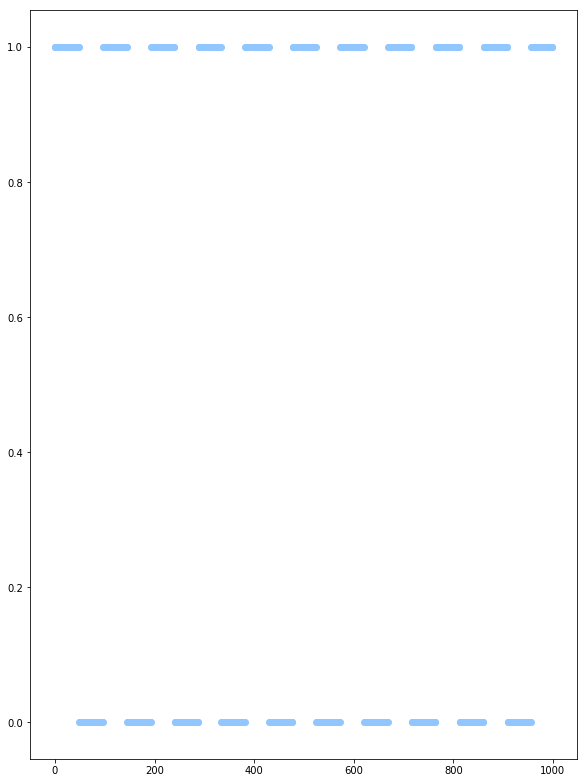

In [417]:
plt.scatter(temp.index[:1000], temp['externSunrise_1'][:1000])